<h2> Regressão dos dados da recuperação global de Cuiabá e Lamego  utilizando RF </h2>
<p> OBJETIVO: Em estatística, a análise exploratória de dados (AED) é uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais, frequentemente com métodos visuais. Um modelo estatístico pode ou não ser usado, mas primariamente a AED tem como objetivo observar o que os dados podem nos dizer além da modelagem formal ou do processo de teste de hipóteses. </p>

<ol>
   <li> Responsável: David Alvarenga Drumond </li> 
   <li> Data: 11/05/2020 </li> 
   <li> Belo horizonte, Minas Gerais, Brasil </li> 
</ol>

<h3> 1.1 Importação das bibliotecas </h3> 

In [1]:
import pickle
import numpy as np
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.regressor import PredictionError
from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
import pandas as pd 

C:\Users\David\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


<h3> 1.1 Importação das bibliotecas </h3> 

In [2]:
filename = 'D:/Drive/AGA - GEOMET/AVALIAÇÃO/2- AJUSTAR MODELO/pca_values.sav'
pca = load(filename )
#pca = pca[:, 0:3]

filename =  'D:/Drive/AGA - GEOMET/AVALIAÇÃO/2- AJUSTAR MODELO/reponses.sav'
yvalues = load(filename )

filename =  'alimentacao.sav'
alimentacao = load(filename )

DESVPAD_RUIDO = 0.7521007548894023

print(pca.shape)

(689, 5)


<h3> 1.2 Ajuste do Regressor </h3> 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(pca, yvalues, test_size=0.2, shuffle=True, random_state=42)
model =  RandomForestRegressor(n_estimators = 1000, max_depth=50, random_state=42).fit(X_train, y_train)
ENDERECO_ARQUIVO_SALVAMENTO = 'D:/Drive/AGA - GEOMET/AVALIAÇÃO/5 - APLICAÇÃO/modelo.sav'
pickle.dump(model, open(ENDERECO_ARQUIVO_SALVAMENTO, 'wb'))

<h3> 1.2.1 Máxima profundidade </h3> 

C:\Users\David\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


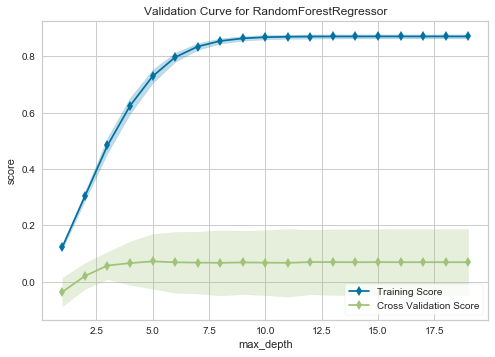

In [4]:

X_train, X_test, y_train, y_test = train_test_split(pca, yvalues, test_size=0.2, shuffle=True, random_state=42)
viz = ValidationCurve(
    model, X =X_train, Y=y_train,  param_name="max_depth",
    param_range=np.arange(1,20), cv=4, scoring= "r2"
)

# Fit and show the visualizer
viz.fit(X_test, y_test)
viz.show()




<h3> 1.2.2 Máxima profundidade </h3> 

C:\Users\David\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


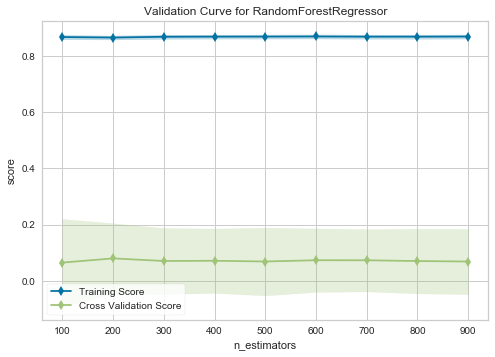

In [5]:

X_train, X_test, y_train, y_test = train_test_split(pca, yvalues, test_size=0.2, shuffle=True, random_state=42)
viz = ValidationCurve(
    model, X =X_train, Y=y_train,param_name="n_estimators",
    param_range=np.arange(100,1000,100), cv=4, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X_test, y_test)
viz.show()

<h3> 1.2.3 Mínimo número de dados na folha </h3> 

C:\Users\David\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


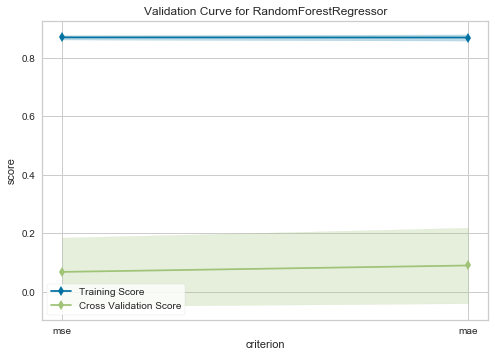

In [6]:

X_train, X_test, y_train, y_test = train_test_split(pca, yvalues, test_size=0.2, shuffle=True, random_state=42)
viz = ValidationCurve(
    model, X =X_train, Y=y_train, param_name="criterion",
    param_range=["mse", "mae"], cv=4, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X_test, y_test)
viz.show()

<h3> 1.3 Gráfico de resíduos </h3> 

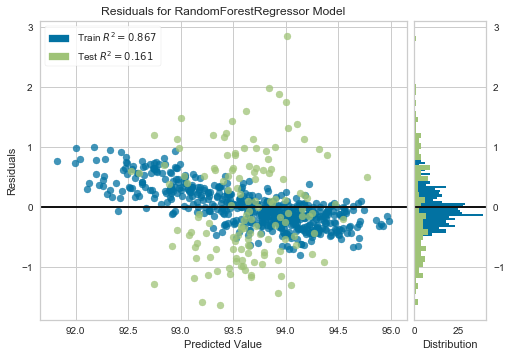

In [7]:


# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof('./plots/residuo.png', facecolor='whitesmoke')
visualizer.show()                 # Finalize and render the figure


<h3> 1.3 Gráfico de predição </h3> 

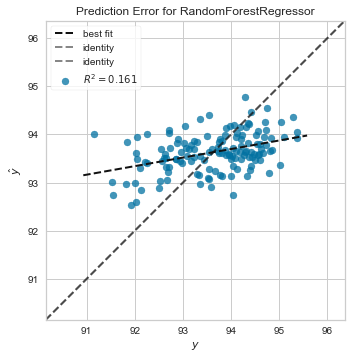

In [8]:


# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(pca, yvalues, test_size=0.2, shuffle=True, random_state=42)

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof('./plots/error.png', facecolor='whitesmoke')
visualizer.show()                 # Finalize and render the figure

<h3> 1.4 Visualizar a tendência </h3> 

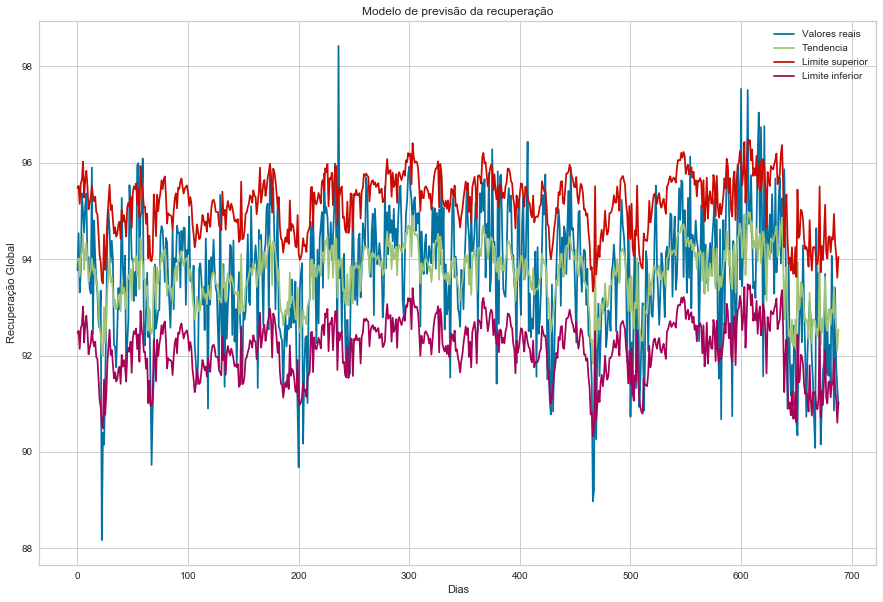

93
689
0.13497822931785197


In [9]:
import matplotlib.pyplot as plt

DATAFRAME_TENDENCIA = pd.read_excel("D:/Drive/AGA - GEOMET/AVALIAÇÃO/1- ANÁLISE EXPLORATÓRIA/previsores.xlsx")
VALORES_PREDITOS = model.predict(pca)
LIMITE_SUPERIOR = VALORES_PREDITOS + 2*DESVPAD_RUIDO
LIMITE_INFERIOR = VALORES_PREDITOS - 2*DESVPAD_RUIDO
TERC_QUARTIL = VALORES_PREDITOS + DESVPAD_RUIDO
PRIM_QUARTIL = VALORES_PREDITOS - DESVPAD_RUIDO

plt.figure(figsize=(15,10))
#plt.plot(DATAFRAME_TENDENCIA.index, DATAFRAME_TENDENCIA['previsores'].values )

plt.plot(DATAFRAME_TENDENCIA.index, alimentacao, label ='Valores reais')
plt.plot(DATAFRAME_TENDENCIA.index, VALORES_PREDITOS, label ='Tendencia')
plt.plot(DATAFRAME_TENDENCIA.index, LIMITE_SUPERIOR,  label ='Limite superior')
plt.plot(DATAFRAME_TENDENCIA.index, LIMITE_INFERIOR, label ='Limite inferior')
#plt.plot(DATAFRAME_TENDENCIA.index, TERC_QUARTIL,  label ='+1 DESVPAD')
#plt.plot(DATAFRAME_TENDENCIA.index, PRIM_QUARTIL, label ='-1 DESVPAD')
plt.xlabel('Dias')
plt.ylabel('Recuperação Global')
plt.title('Modelo de previsão da recuperação')
plt.savefig('resultados.png', dpi =300)
plt.legend()
plt.show()

SOMA = 0
for i, j, z in zip(alimentacao, LIMITE_SUPERIOR, LIMITE_INFERIOR): 
    if  i > j or i < z:
        SOMA += 1

        
print(SOMA)
print(LIMITE_SUPERIOR.shape[0])
print(SOMA/LIMITE_SUPERIOR.shape[0])